In [2]:
#Import library 
from pathlib import Path
import os
from PIL import Image
import numpy as np
from skimage import io
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tqdm import tqdm

In [3]:
__PATH = Path().parent
__DBPATH = __PATH / 'db'
dbpath = {}
for file in os.listdir(__DBPATH):
    dbpath[file] = []
    for data in os.listdir(__DBPATH / file):
        dbpath[file].append(__DBPATH / file / data)
print(dbpath)

{'Jeruk': [WindowsPath('db/Jeruk/1.png'), WindowsPath('db/Jeruk/10.png'), WindowsPath('db/Jeruk/11.png'), WindowsPath('db/Jeruk/12.png'), WindowsPath('db/Jeruk/13.png'), WindowsPath('db/Jeruk/14.png'), WindowsPath('db/Jeruk/15.png'), WindowsPath('db/Jeruk/16.png'), WindowsPath('db/Jeruk/17.png'), WindowsPath('db/Jeruk/18.png'), WindowsPath('db/Jeruk/19.png'), WindowsPath('db/Jeruk/2.png'), WindowsPath('db/Jeruk/20.png'), WindowsPath('db/Jeruk/3.png'), WindowsPath('db/Jeruk/4.png'), WindowsPath('db/Jeruk/5.png'), WindowsPath('db/Jeruk/6.png'), WindowsPath('db/Jeruk/7.png'), WindowsPath('db/Jeruk/8.png'), WindowsPath('db/Jeruk/9.png'), WindowsPath('db/Jeruk/aug_0_1013.jpg'), WindowsPath('db/Jeruk/aug_0_1021.jpg'), WindowsPath('db/Jeruk/aug_0_1040.jpg'), WindowsPath('db/Jeruk/aug_0_1052.jpg'), WindowsPath('db/Jeruk/aug_0_1068.jpg'), WindowsPath('db/Jeruk/aug_0_11.jpg'), WindowsPath('db/Jeruk/aug_0_1102.jpg'), WindowsPath('db/Jeruk/aug_0_1110.jpg'), WindowsPath('db/Jeruk/aug_0_1133.jpg'), 

In [4]:
#All database
X = []
y = []
for key in dbpath:
    for data in dbpath[key]:
        img = load_img(data, target_size=(128,128))
        img_array = img_to_array(img)
        X.append(img_array)
        y.append(key)
X = np.array(X, dtype='float32')/255

import random
combined = list(zip(X,y))
random.shuffle(combined)
X[:], y[:] = zip(*combined)

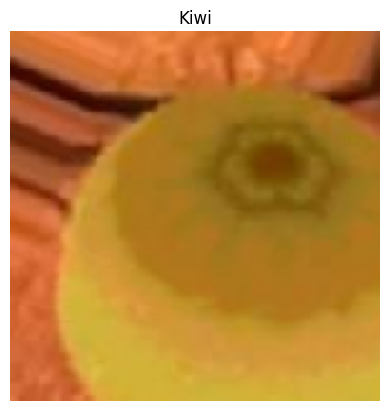

In [5]:
#visualization
def drawImg(img, title):
    import matplotlib.pyplot as plt
    plt.imshow(img)
    plt.axis('off')
    plt.title(title)
    plt.show()
    return

drawImg(X[0], y[0])

In [6]:
print(y)

['Kiwi', 'Jeruk', 'Jeruk', 'Semangka', 'Pisang', 'Semangka', 'Kiwi', 'Semangka', 'Kiwi', 'Semangka', 'Jeruk', 'Semangka', 'Pisang', 'Nanas', 'Kiwi', 'Jeruk', 'Jeruk', 'Semangka', 'Kiwi', 'Kiwi', 'Semangka', 'Pisang', 'Jeruk', 'Kiwi', 'Semangka', 'Semangka', 'Pisang', 'Semangka', 'Jeruk', 'Jeruk', 'Kiwi', 'Kiwi', 'Semangka', 'Jeruk', 'Jeruk', 'Semangka', 'Jeruk', 'Jeruk', 'Jeruk', 'Kiwi', 'Pisang', 'Kiwi', 'Jeruk', 'Nanas', 'Kiwi', 'Pisang', 'Nanas', 'Semangka', 'Pisang', 'Semangka', 'Semangka', 'Pisang', 'Semangka', 'Kiwi', 'Pisang', 'Semangka', 'Jeruk', 'Nanas', 'Pisang', 'Nanas', 'Nanas', 'Semangka', 'Kiwi', 'Pisang', 'Semangka', 'Semangka', 'Jeruk', 'Jeruk', 'Pisang', 'Nanas', 'Jeruk', 'Jeruk', 'Nanas', 'Semangka', 'Semangka', 'Semangka', 'Jeruk', 'Semangka', 'Nanas', 'Jeruk', 'Jeruk', 'Jeruk', 'Semangka', 'Nanas', 'Pisang', 'Nanas', 'Semangka', 'Jeruk', 'Jeruk', 'Nanas', 'Pisang', 'Semangka', 'Semangka', 'Semangka', 'Semangka', 'Jeruk', 'Pisang', 'Nanas', 'Semangka', 'Jeruk', 'Kiwi

In [7]:
"""
#Augmentation generator
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

#Augmentation
for key in dbpath:
    for data in dbpath[key]:
        img = load_img(data)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)
        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir=__DBPATH / key, save_prefix='aug', save_format='jpg'):
            i += 1
            if i > 20:
                break
"""

"\n#Augmentation generator\ndatagen = ImageDataGenerator(\n    rotation_range=40,\n    width_shift_range=0.2,\n    height_shift_range=0.2,\n    shear_range=0.2,\n    zoom_range=0.2,\n    horizontal_flip=True,\n    fill_mode='nearest')\n\n#Augmentation\nfor key in dbpath:\n    for data in dbpath[key]:\n        img = load_img(data)\n        x = img_to_array(img)\n        x = x.reshape((1,) + x.shape)\n        i = 0\n        for batch in datagen.flow(x, batch_size=1, save_to_dir=__DBPATH / key, save_prefix='aug', save_format='jpg'):\n            i += 1\n            if i > 20:\n                break\n"

In [8]:
# #SVM Model manual
# class SVM:
#     def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
#         self.lr = learning_rate
#         self.lambda_param = lambda_param
#         self.n_iters = n_iters
#         self.w = None
#         self.b = None
        
#     def fit(self, X, y):
#         n_samples, n_features = X.shape
        
#         y_ = np.where(y <= 0, -1, 1)
        
#         self.w = np.zeros(n_features)
#         self.b = 0
        
#         for _ in range(self.n_iters):
#             for idx, x_i in enumerate(X):
#                 condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
#                 if condition:
#                     self.w -= self.lr * (2 * self.lambda_param * self.w)
#                 else:
#                     self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
#                     self.b -= self.lr * y_[idx]
        
#     def predict(self, X):
#         approx = np.dot(X, self.w) - self.b
#         return np.sign(approx)
    
#     def score(self, X, y):
#         y_ = np.where(y <= 0, -1, 1)
#         y_pred = self.predict(X)
#         accuracy = np.mean(y_pred == y_)
#         return accuracy
    



In [9]:
class SVM2:
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeLoss(self,W,b,X,Y):
        loss  = 0.0
        
        loss += .5*np.dot(W,W.T)
        
        m = X.shape[0]
        
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.C *max(0,(1-ti))
            
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=50,learning_rate=0.001,maxItr=500):
        
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        #Init the model parameters
        W = np.zeros((1,no_of_features))
        bias = 0
        
        #Initial Loss
        
        #Training from here...
        # Weight and Bias update rule
        losses = []
        
        for i in range(maxItr):
            #Training Loop
            
            l = self.hingeLoss(W,bias,X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            #Batch Gradient Descent(Paper) with random shuffling
            for batch_start in range(0,no_of_samples,batch_size):
                #Assume 0 gradient for the batch
                gradw = 0
                gradb = 0
                
                #Iterate over all examples in the mini batch
                for j in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        i = ids[j]
                        ti =  Y[i]*(np.dot(W,X[i].T)+bias)
                        
                        if ti>1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                            
                #Gradient for the batch is ready! Update W,B
                W = W - n*W + n*gradw
                bias = bias + n*gradb
                
        
        self.W = W
        self.b = bias
        return W,bias,losses

In [10]:
#Convert to numpy array
# for item in X:
#     item = item.astype(np.float64)

#change shape X
# X = np.array(X).reshape(-1, 48*48)
        
        
maps = {
    'Jeruk' : 0,
    'Kiwi'  : 1,
    'Nanas' : 2,
    'Pisang': 3,
    'Semangka': 4
}
y = np.array([maps[i] for i in y])
y = np.array(y)

In [11]:
M = X.shape[0]
X = X.reshape(M, -1)
print(X.shape)
print(y.shape)

(1514, 49152)
(1514,)


In [12]:
# #Coba model
# clf = SVM2()
# clf.fit(X, y)
# print(clf.W, clf.b)

In [13]:
# print(clf.hingeLoss(clf.W, clf.b, X, y))

In [14]:
"""Gabungin data biar jadi 1 matrix"""
def getDataPairForSVM(d1,d2):
    
    l1,l2 = d1.shape[0], d2.shape[0]
    samples = l1+l2
    features = d1.shape[1]
    
    data_pair = np.zeros((samples,features))
    data_labels = np.zeros((samples,))
    
    data_pair[:l1,:] = d1
    data_pair[l1:,:] = d2
    
    data_labels[:l1] = -1
    data_labels[l1:] = 1
    
    return data_pair, data_labels

In [15]:
numOfClass = len(np.unique(y))
print(numOfClass)

5


In [16]:
def classWiseData(x, y):
    data = {}
    
    for i in range(numOfClass):
        data[i] = []
        
    for i in range(x.shape[0]):
        data[y[i]].append(x[i])
        
    for k in data.keys():
        data[k] = np.array(data[k])
        
    return data

In [17]:
data = classWiseData(X,y)

In [18]:
print(len(data[1]))

218


In [19]:
print(data[0].shape[0])
print(data[1].shape[0])
print(data[2].shape[0])
print(data[3].shape[0])
print(data[4].shape[0])

# #samakan data jadi minimum smua data
# data[0] = data[0][:data[3].shape[0]]
# data[1] = data[1][:data[3].shape[0]]
# data[2] = data[2][:data[3].shape[0]]
# data[3] = data[3][:data[3].shape[0]]
# data[4] = data[4][:data[3].shape[0]]




434
218
219
215
428


In [20]:
print(len(data[0][0]))

49152


In [21]:
print(data[0].shape[0])
print(data[1].shape[0])
print(data[2].shape[0])
print(data[3].shape[0])
print(data[4].shape[0])

434
218
219
215
428


In [22]:
# print(data)

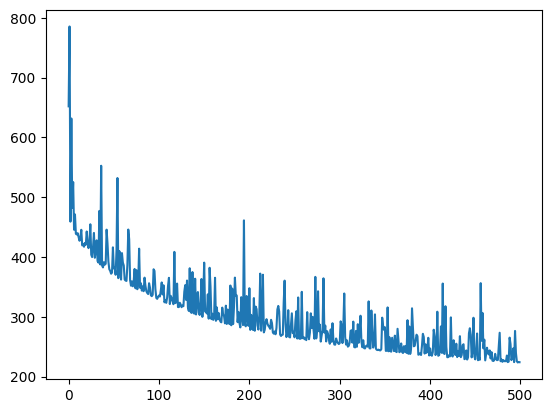

In [23]:
import matplotlib.pyplot as plt
currentSVM = SVM2()
xfind, yfind = getDataPairForSVM(data[0],data[1])
w,b,loss = currentSVM.fit(xfind, yfind, learning_rate=0.00001, maxItr=500)
plt.plot(loss)

In [24]:
def trainSVMs(x,y):
    svm_classifiers = {}
    
    for i in tqdm(range(numOfClass), desc=f'Training Progress'):
        svm_classifiers[i] = {}
        for j in tqdm(range(i+1, numOfClass), desc=f'{i} Progress'):
            xpair,ypair = getDataPairForSVM(data[i],data[j])
            wts,b,loss = currentSVM.fit(xpair, ypair,learning_rate=0.00001,maxItr=100)
            svm_classifiers[i][j] = (wts,b)
            
            plt.plot(loss)
            plt.show()
            
    return svm_classifiers
        

Training Progress:   0%|          | 0/5 [00:00<?, ?it/s]

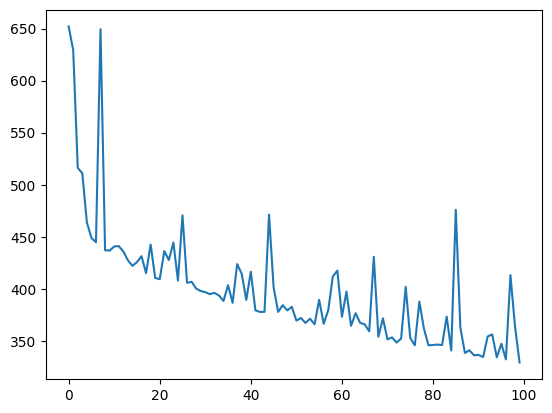

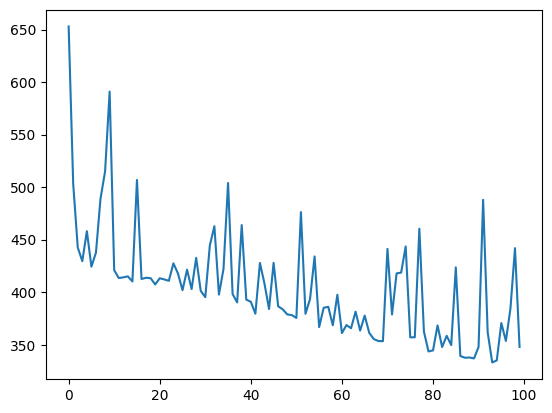

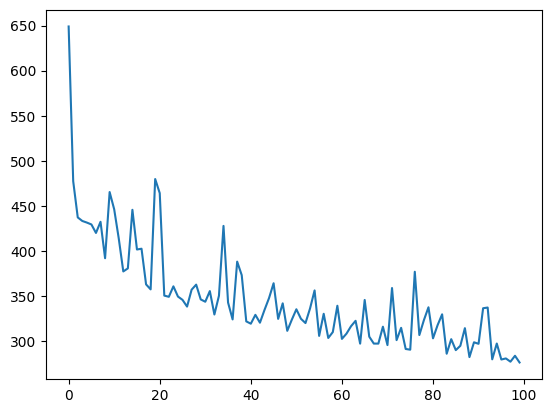

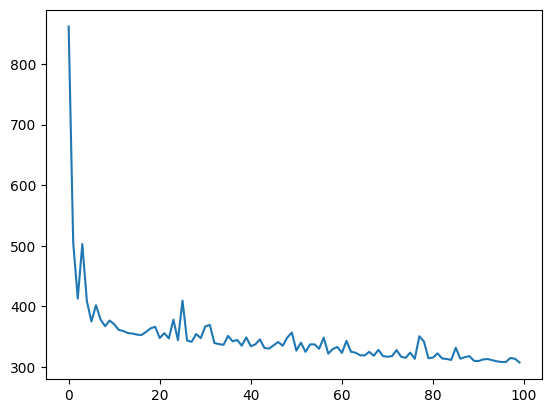

Training Progress:  20%|██        | 1/5 [00:38<02:32, 38.03s/it]

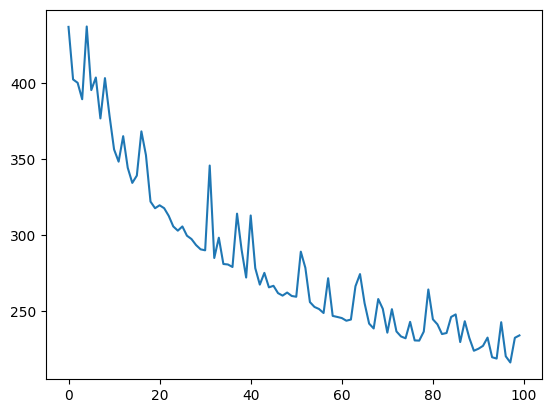

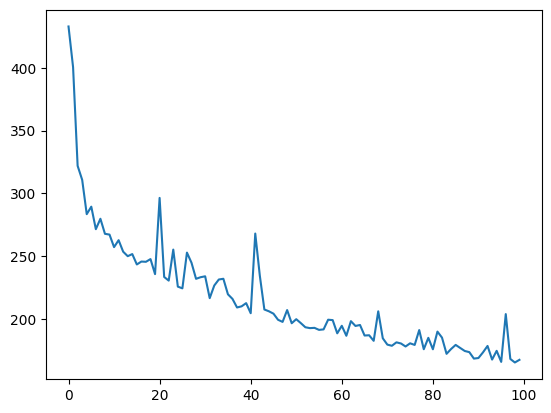

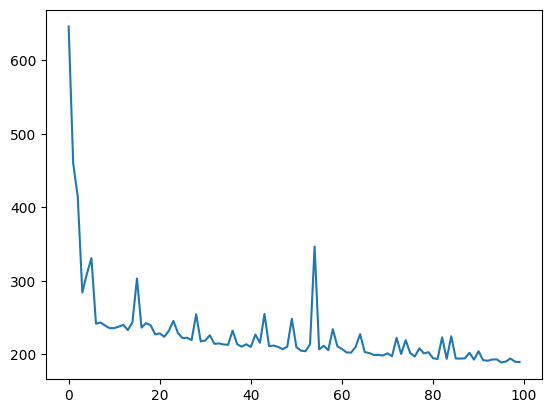

Training Progress:  40%|████      | 2/5 [00:59<01:24, 28.15s/it]

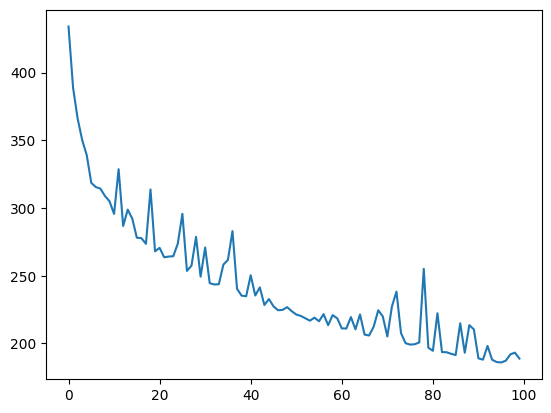

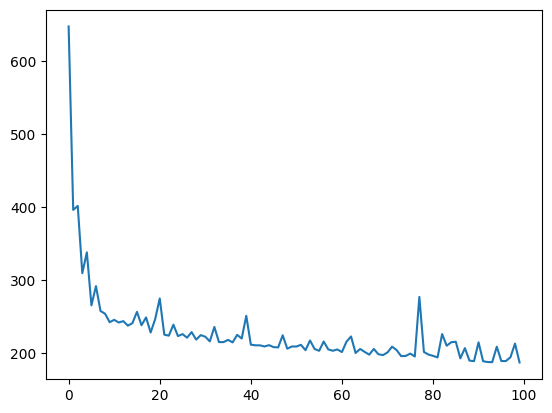

Training Progress:  60%|██████    | 3/5 [01:14<00:44, 22.12s/it]

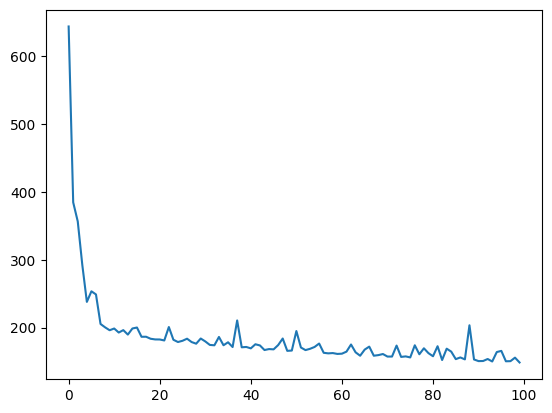

3 Progress: 100%|██████████| 1/1 [00:08<00:00,  8.77s/it]
4 Progress: 0it [00:00, ?it/s]██  | 4/5 [01:22<00:16, 16.85s/it]
Training Progress: 100%|██████████| 5/5 [01:22<00:00, 16.60s/it]


In [25]:
trainedSVM = trainSVMs(X,y)

In [26]:
for item in trainedSVM:
    print(item)
    for j in trainedSVM[item]:
        w,b = trainedSVM[item][j]
        print(item,j,w,b)

0
0 1 [[-0.00051844 -0.00079578  0.00152501 ...  0.00200236 -0.00057288
   0.00018666]] -0.009109999999999998
0 2 [[ 0.00132771  0.00298605  0.00055865 ... -0.00025483  0.00109941
  -0.00071674]] 0.025370000000000014
0 3 [[-0.00238606  0.0004549  -0.00032484 ... -0.00416228 -0.00096105
  -0.0016509 ]] -0.0014299999999999985
0 4 [[ 0.00023439 -0.00052424  0.00104493 ...  0.00171158  0.00041875
   0.000688  ]] -0.004410000000000008
1
1 2 [[ 0.00095253  0.00240619 -0.00122622 ... -0.00200197  0.00147841
  -0.00103857]] 0.027149999999999994
1 3 [[-0.0007754   0.00103262 -0.00107658 ... -0.00609746 -0.0009643
  -0.00183402]] -2.9999999999999564e-05
1 4 [[ 8.11459407e-04  3.28482930e-04 -4.97216739e-05 ...  2.38533609e-04
   5.07633356e-04  2.01936657e-04]] -0.0011899999999999994
2
2 3 [[-0.00326965 -0.00217866 -0.00093928 ... -0.00247052 -0.00103442
  -0.00087084]] -0.01669999999999999
2 4 [[-0.00024638 -0.00218777  0.00015811 ...  0.00133031 -0.00041426
   0.00044821]] -0.01482000000000001

In [27]:
def predict(X):
    count = np.zeros((numOfClass,))
    
    for i in range(numOfClass):
        for j in range(i+1,numOfClass):
            w,b = trainedSVM[i][j]
            #Prediksi label yang paling banyak
            z = np.dot(X,w.T)+b
            z = 1 if z>=0 else -1
            
            if(z==1):
                count[j] += 1
            else:
                count[i] += 1
                
    final_prediction = np.argmax(count)
    return final_prediction

In [28]:
print(predict(X[0]), y[0])

1 1


In [29]:
#Cek akurasi
def accuracy(X,y):
    count = 0
    for i in range(len(X)):
        prediction = predict(X[i])
        if prediction == y[i]:
            count += 1
    return count/len(X)

In [30]:
AccuracyX = accuracy(X, y)
print(AccuracyX)

0.5865257595772787


In [31]:
#Test
import random
SampleData = []
labels = []
randomChoice = ['Jeruk', 'Kiwi', 'Nanas', 'Pisang', 'Semangka']
for _ in range(10):
    randomNum = random.randint(0, len(X)-1)
    SampleData.append(X[randomNum])
    labels.append(y[randomNum])

SampleData = np.array(SampleData)
labels = np.array(labels)
print(SampleData, labels)
print(accuracy(SampleData, labels))


#reverse maps
# reverse_maps = {v: k for k, v in maps.items()}
# print(reverse_maps[prediction[0]])

[[0.3019608  0.2901961  0.         ... 0.52156866 0.654902   0.10980392]
 [0.54901963 0.28235295 0.13725491 ... 0.5529412  0.2784314  0.13725491]
 [0.33333334 0.15686275 0.08235294 ... 0.08627451 0.02352941 0.02352941]
 ...
 [0.22745098 0.1254902  0.07450981 ... 0.41960785 0.21568628 0.12156863]
 [0.8980392  0.7764706  0.21960784 ... 0.5568628  0.26666668 0.12941177]
 [0.5294118  0.2509804  0.14117648 ... 0.50980395 0.25882354 0.10980392]] [4 4 2 1 4 4 1 4 1 4]
0.9


[[226.  51.   7.  38. 112.]
 [ 38.  92.  15.  16.  57.]
 [ 77.  13.  58.  19.  52.]
 [ 37.   9.   7. 119.  43.]
 [ 11.  11.   7.   6. 393.]]


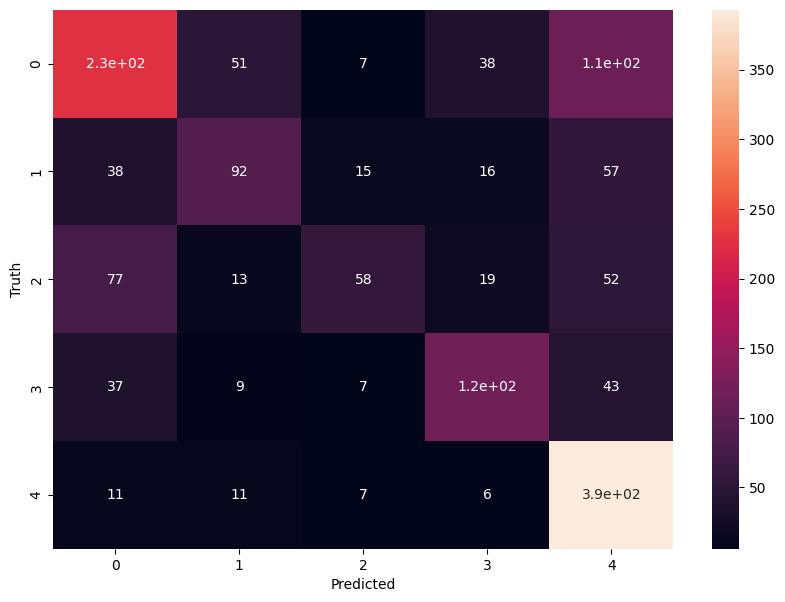

Accuracy:  0.5865257595772787


In [32]:
#Confusion Matrix Manual
def confusionMatrix(X, y):
    confusion_matrix = np.zeros((numOfClass, numOfClass))
    for i in range(len(X)):
        prediction = predict(X[i])
        confusion_matrix[y[i]][prediction] += 1
    return confusion_matrix

confusionMatrixX = confusionMatrix(X, y)
print(confusionMatrixX)
#Change typedata to int
confusionMatrixX = confusionMatrixX.astype(int)


#Heatmap
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(confusionMatrixX, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print('Accuracy: ', AccuracyX)

# Implementasi Desktop

In [33]:
#Cv2 to read desktop

import cv2
import win32api, win32con
import pyautogui
from time import time,sleep

pic = pyautogui.screenshot(region=(0,0, 1920, 1080))

#show image
# pic

loop_time = time()

while True:
    frame = cv2.cvtColor(np.array(pyautogui.screenshot(region=(0,0, 400,400))), cv2.COLOR_RGB2BGR)
    #add FPS to frame
    cv2.putText(frame, f'FPS {round(1/(time()-loop_time),0)}', (10,20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0),1)
    
    
    
    cv2.imshow("frame", frame)
    # print(f'FPS {1/(time()-loop_time)}')
    
    loop_time = time()
    
    if cv2.waitKey(1) == ord('q'):
        cv2.destroyAllWindows()
        break

In [119]:
print(data[0].shape)

(434, 49152)


(256, 256, 3)
Pisang


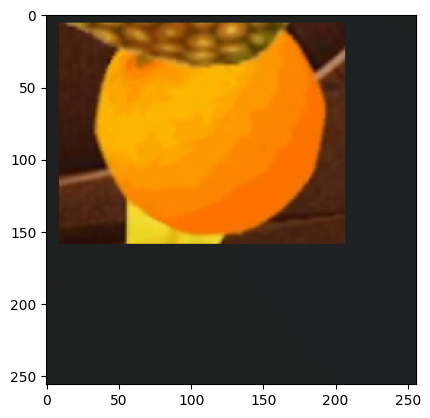

In [187]:
#Predict pic
frame = cv2.cvtColor(np.array(pyautogui.screenshot(region=(150,180, 128*2,128*2))), cv2.COLOR_RGB2RGBA)
plt.imshow(frame)
RGB_Image = cv2.cvtColor(frame, cv2.COLOR_RGBA2RGB)
print(RGB_Image.shape)
#resize to 128x128x3
frame = cv2.resize(RGB_Image, (128,128))

frame = np.reshape(frame, (1, np.prod(frame.shape)))


# print(predict(frame))

reverse_maps = {v: k for k, v in maps.items()}
print(reverse_maps[predict(frame)])

# Predicting using Desktop

In [42]:
# loop_time = time()

while True:
    frame = cv2.cvtColor(np.array(pyautogui.screenshot(region=(0,0, 400,400))), cv2.COLOR_RGB2BGR)
    
    #add FPS to frame
    # cv2.putText(frame, f'FPS {round(1/(time()-loop_time),0)}', (10,20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0),1)
    
    #predict image
    frame_predict = np.array(frame)
    frame_predict = frame_predict.reshape(-1,1)
    predictions = predict(frame_predict)
    cv2.putText(frame, f'{predictions}')
    
    cv2.imshow("frame", frame)
    # print(f'FPS {1/(time()-loop_time)}')
    
    # loop_time = time()
    
    if cv2.waitKey(1) == ord('q'):
        cv2.destroyAllWindows()
        break

ValueError: shapes (480000,1) and (49152,1) not aligned: 1 (dim 1) != 49152 (dim 0)